# Teoria da Computação

### Quarta lista de exercícios
**Máquina de Mealy e Máquina de Moore**
<br>Prof. Dr. Márcio Basgalupp
<br>Aron Ifanger Maciel
<br>Entregue em 18 de abril de 2018
hr {
    display: block;
    height: 1px;
    border: 0;
    border-top: 2px solid #fff;
    margin: 1em 0;
    padding: 0;
}

<hr/>
# Exercício 1

*Defina formalmente a função programa estendida para as Máquinas de Mealy e de Moore.*

# Resposta

A **Máquina de Mealy** é definida como uma 6-upla:

<center> $ M = (\Sigma, Q, \delta, q_0, F, \Delta) $ </center>

onde:

* $\Sigma$: é um alfabeto de síbolos de entrada;
* $Q$: conjunto de estados possíveis;
* $\delta$: função programa, **definida como: 
<br> <center> $ \delta: Q \times \Sigma \rightarrow Q \times \Delta^* $** </center>
* $q_0$: estado inicial;
* $F$: conjunto de estados finais;
* $\Delta$: alfabeto de símbolos de saída.

A **Máquina de Moore** é definida como uma 7-upla:

<center> $ M = (\Sigma, Q, \delta, q_0, F, \Delta, \delta_S) $ </center>

onde:

* $\Sigma$: é um alfabeto de síbolos de entrada;
* $Q$: conjunto de estados possíveis;
* $\delta$: função programa, **definida como: 
<br> <center> $ \delta: Q \times \Sigma \rightarrow Q $** </center>
* $q_0$: estado inicial;
* $F$: conjunto de estados finais;
* $\Delta$: alfabeto de símbolos de saída.
* $\delta_S$: função de saída, **definida como: 
<br> <center>$ \delta_S: Q \rightarrow \Delta^* $ **</center>


<hr/>
# Exercício 2

*Desenvolva uma Máquina de Mealy e uma de Moore que realizem a conversão da repreentação de valores monetários de dólares para reais. Por exemplo, dado o valor US\$25,010.59 deve ser gravado o valor R\$25.010,59 na fita de saída (atenção para o uso da vírgula e do ponto nos dois valores). Adicionalmente, os autômatos deve verificar se a entrada é um valor monetário válido.*

# Resposta

### Implementação da função que simula a Máquina de Moore

In [22]:
def moore(funcaoTransicao, estadoInicial, estadosFinais, palavra):
    estadoAtual = estadoInicial
    saida = ""
    for letra in palavra:
        try: 
            (estadoAtual, letraSaida) = funcaoTransicao[estadoAtual][letra]
            saida += letraSaida
        except: return("REJEITA: %s"% palavra)
    
    return("ACEITA: %s -> %s"%(palavra, saida) if estadoAtual in estadosFinais else "REJEITA")

### Exemplo de uso da Máquina de Moore
Uma vez que a Máquina de Moore faz as impressões nos estados, é necessário que exista um estado para cada possível impressão do alfabeto, gerando a necessidade de gerar muitos estados para produzir o resultado esperado. Em função disto foram implementadas algumas funções que auxiliam a geração das funções de transição para cada um destes estados.

In [23]:
# Gera um estado para cada elemento da lista de caractere 
# Exemplo: geraDictMoore("q3", range(10),"q4") gera o seguinte dicionário:
# {'q3': {'0': ('q4-0', '0'),'1': ('q4-1', '1'),'2': ('q4-2', '2'),'3': ('q4-3', '3'),'4': ('q4-4', '4'),
#         '5': ('q4-5', '5'),'6': ('q4-6', '6'),'7': ('q4-7', '7'),'8': ('q4-8', '8'),'9': ('q4-9', '9')}}
def geraDictMoore(chave, listaCaractere = [], valor = "", adicional = []): 
    return({chave:dict([(str(i),(valor+"-"+str(i), str(i))) for i in listaCaractere] + adicional)})

# Criação do dicinário que representa as funções de transição para a conversão da representação dos valores monetários 
# (Exercício 2)
ft = {}
ft.update({"q0":{"U":("q1", "")}})
ft.update({"q1":{"S":("q2", "R")}})
ft.update({"q2":{"$":("q3", "$")}})
ft.update(geraDictMoore("q3", range(10),"q4"))
for estado in ft["q3"].values():   ft.update(geraDictMoore(estado[0], range(10),"q5",[(",",("q7", ".")),(".",("q10", ","))]))
for estado in ft["q4-1"].values(): ft.update(geraDictMoore(estado[0], range(10),"q6",[(",",("q7", ".")),(".",("q10", ","))]))
for estado in ft["q5-1"].values(): ft.update(geraDictMoore(estado[0], adicional = [(",",("q7", ".")),(".",("q10", ","))]))
ft.update(geraDictMoore("q7", range(10),"q8"))
for estado in ft["q7"].values():   ft.update(geraDictMoore(estado[0], range(10), "q9"))
for estado in ft["q8-1"].values(): ft.update(geraDictMoore(estado[0], range(10), "q6"))
ft.update(geraDictMoore("q10", range(10),"q11"))
for estado in ft["q10"].values():  ft.update(geraDictMoore(estado[0], range(10), "q12"))

estadoInicial = "q0"
estadosFinais = [estado[0] for estado in geraDictMoore("q11", range(10), "q12")["q11"].values()]

# Exemplos de casos que são aceitos pela Márquina de Moore deste exercício
print(moore(ft, estadoInicial, estadosFinais, palavra = "US$123,100.09"))
print(moore(ft, estadoInicial, estadosFinais, palavra = "US$6,254.18"))
print(moore(ft, estadoInicial, estadosFinais, palavra = "US$23.27"))
print(moore(ft, estadoInicial, estadosFinais, palavra = "US$8.53"))
print(moore(ft, estadoInicial, estadosFinais, palavra = "US$0.53"))

# Exemplos de casos que são aceitos pela Márquina de Moore deste exercício
print(moore(ft, estadoInicial, estadosFinais, palavra = "US$,100.09"))
print(moore(ft, estadoInicial, estadosFinais, palavra = "U$6,254.18"))
print(moore(ft, estadoInicial, estadosFinais, palavra = "S$23.27"))
print(moore(ft, estadoInicial, estadosFinais, palavra = "$8.53"))
print(moore(ft, estadoInicial, estadosFinais, palavra = "R$0.53"))
print(moore(ft, estadoInicial, estadosFinais, palavra = "R$0.541"))

ACEITA: US$123,100.09 -> R$123.100,09
ACEITA: US$6,254.18 -> R$6.254,18
ACEITA: US$23.27 -> R$23,27
ACEITA: US$8.53 -> R$8,53
ACEITA: US$0.53 -> R$0,53
REJEITA: US$,100.09
REJEITA: U$6,254.18
REJEITA: S$23.27
REJEITA: $8.53
REJEITA: R$0.53
REJEITA: R$0.541


### Implementação da função que simula a Máquina de Mealy

In [20]:
def mealy(funcaoTransicao, estadoInicial, estadosFinais, funcaoSaida, palavra):
    estadoAtual = estadoInicial
    saida = ""
    for letra in palavra:
        try: saida += str(funcaoSaida[(estadoAtual, letra)])
        except: None
        try: estadoAtual = funcaoTransicao[estadoAtual][letra]
        except: return("REJEITA: %s"% palavra)
    
    return("ACEITA: %s -> %s"%(palavra, saida) if estadoAtual in estadosFinais else "REJEITA")

### Exemplo de uso da Máquina de Mealy
Para facilitar a geração das funções de transição, também foram implementadas funções auxiliares.

In [21]:
def geraDictMealy(chave, listaLetras = [], valor = "", adicional = []):
    return({chave: dict([(str(letra), valor) for letra in listaLetras] + adicional)})

def geraSaidaMealy(chave, listaLetra = range(10)):
    return(dict([((chave, str(letra)), str(letra)) for letra in listaLetra]))

# Criação do dicinário que representa as funções de transição para a conversão da representação dos valores monetários 
# (Exercício 2)
ft = {}
ft.update({"q0":{"U":"q1"}})
ft.update({"q1":{"S":"q2"}})
ft.update({"q2":{"$":"q3"}})
ft.update(geraDictMealy("q3", range(10), "q4"))
ft.update(geraDictMealy("q4", range(10), "q5", [(",","q7"),(".","q10")]))
ft.update(geraDictMealy("q5", range(10), "q6", [(",","q7"),(".","q10")]))
ft.update(geraDictMealy("q6", adicional = [(",","q7"),(".","q10")]))
ft.update(geraDictMealy("q7", range(10),"q8"))
ft.update(geraDictMealy("q8", range(10), "q9"))
ft.update(geraDictMealy("q9", range(10), "q6"))
ft.update(geraDictMealy("q10", range(10), "q11"))
ft.update(geraDictMealy("q11", range(10), "q12"))

# Criação do dicinário que gera a saída para o exercício de conversão da representação dos valores monetários 
# Este dicionário atribui a cada estado, um possível caractere de impressão. 
fs = {}
fs.update({("q1","S"):"R"})
fs.update({("q2","$"):"$"})
fs.update(geraSaidaMealy("q3"))
fs.update({("q3", ","):".", ("q3", "."):","})
fs.update(geraSaidaMealy("q4"))
fs.update({("q4", ","):".", ("q4", "."):","})
fs.update(geraSaidaMealy("q5"))
fs.update({("q5", ","):".", ("q5", "."):","})
fs.update({("q6",","):".", ("q6","."):","})
fs.update(geraSaidaMealy("q7"))
fs.update(geraSaidaMealy("q8"))
fs.update(geraSaidaMealy("q9"))
fs.update(geraSaidaMealy("q10"))
fs.update({("q10",","):".", ("q10","."):","})
fs.update(geraSaidaMealy("q11"))

estadoInicial = "q0"
estadosFinais = geraDictMealy("q11", range(10), "q12")["q11"].values()

# Exemplos de casos que são aceitos pela Márquina de Moore deste exercício
print(mealy(ft, estadoInicial, estadosFinais, fs, palavra = "US$123,100.09"))
print(mealy(ft, estadoInicial, estadosFinais, fs, palavra = "US$6,254.18"))
print(mealy(ft, estadoInicial, estadosFinais, fs, palavra = "US$23.27"))
print(mealy(ft, estadoInicial, estadosFinais, fs, palavra = "US$8.53"))
print(mealy(ft, estadoInicial, estadosFinais, fs, palavra = "US$0.53"))

# Exemplos de casos que são aceitos pela Márquina de Moore deste exercício
print(mealy(ft, estadoInicial, estadosFinais, fs, palavra = "US$,100.09"))
print(mealy(ft, estadoInicial, estadosFinais, fs, palavra = "U$6,254.18"))
print(mealy(ft, estadoInicial, estadosFinais, fs, palavra = "S$23.27"))
print(mealy(ft, estadoInicial, estadosFinais, fs, palavra = "$8.53"))
print(mealy(ft, estadoInicial, estadosFinais, fs, palavra = "R$0.53"))
print(mealy(ft, estadoInicial, estadosFinais, fs, palavra = "R$0.541"))

ACEITA: US$123,100.09 -> R$123.100,09
ACEITA: US$6,254.18 -> R$6.254,18
ACEITA: US$23.27 -> R$23,27
ACEITA: US$8.53 -> R$8,53
ACEITA: US$0.53 -> R$0,53
REJEITA: US$,100.09
REJEITA: U$6,254.18
REJEITA: S$23.27
REJEITA: $8.53
REJEITA: R$0.53
REJEITA: R$0.541


<hr/>
# Exercício 3

*Considere o exemplo de diálogo apresentado para a Máquina de Mealy:*

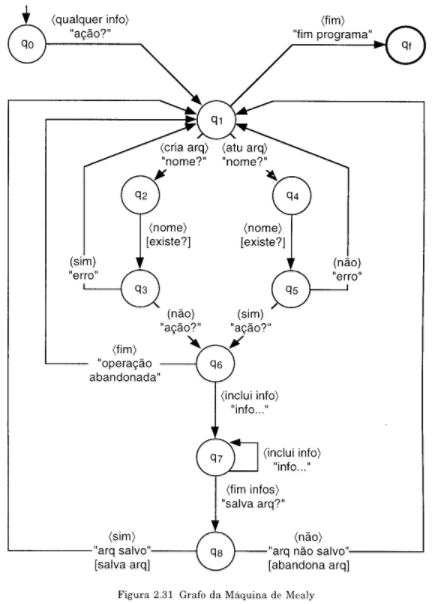
    
*a. Desenvolva uma Máquina de Moore que realize o mesmo processamento*

# Resposta

Segue abaixo uma modificação da função que simula a Máquina de Moore para receber as entradas dinamicamente, ao invés de uma lista pré-formulada. Esta alteração visa demonstrar o funcionamento da máquina criada para o exercício.

In [ ]:
def mooreDinamico(funcaoTransicao, estadoInicial, estadosFinais):
    estadoAtual = estadoInicial
    while(estadoAtual not in estadosFinais):
        letra = input()
        try: 
            (estadoAtual, letraSaida) = funcaoTransicao[estadoAtual][letra]
            print(letraSaida)
        except: return("REJEITA")
    
    return("ACEITA" if estadoAtual in estadosFinais else "REJEITA")

Função de transição do exercício 3:

In [2]:
ft = {
    "q0":{"":("q1", "acao?")},
    "q1":{"cria arq":("q2","nome?"),"atu arq":("q4","nome?"), "fim":("qf", "fim programa")},
    "q2":{"sim": ("q1", "erro"), "nao": ("q6", "acao?")},
    "q4":{"nao": ("q1", "erro"), "sim": ("q6", "acao?")},
    "q6":{"fim": ("q1", "operação abandonada"), "inclui info": ("q7", "info...")},
    "q7":{"inclui info": ("q7", "info..."), "fim infos": ("q8", "salva arq?")},
    "q8":{"sim": ("q1", "arq salvo"), "nao": ("q1", "arq não salvo")},
}

estadoInicial = "q0"
estadosFinais = ["qf"]

mooreDinamico(ft, estadoInicial, estadosFinais)


acao?
cria arq
nome?
nao
acao?
inclui info
info...
fim infos
salva arq?
sim
arq salvo
fim
fim programa


'ACEITA'

<hr/>
# Exercício 4

*Desenvolva um programa de computador que simule o processamento de qualquer Autômato Finito Determinístico, como segue:*

*a. Entrada: função de transição $ \delta $, estado inicial, conjunto de estados finais e as palavras a serem processadas;*
   
*b. Saída: condição de parada ACEITA/REJEITA e identificação do estado de parada.*
    


# Resposta

### Implementação da função que processa um AFD

In [72]:
def afd(funcaoTransicao, estadoInicial, estadosFinais, palavra):
    estadoAtual = estadoInicial
    
    for letra in palavra:
        try: estadoAtual = funcaoTransicao[estadoAtual][letra]
        except: return("REJEITA", estadoAtual, letra)
    
    return("ACEITA" if estadoAtual in estadosFinais else "REJEITA")

### Exemplo de uso para reconhecimento de palavras com número par de 'a' e de 'b'

In [73]:
funcaoTransicao = {
    "q0": {"a": "q1", "b": "q2"},
    "q1": {"a": "q0", "b": "q3"},
    "q2": {"a": "q3", "b": "q0"},
    "q3": {"a": "q2", "b": "q1"},
}
estadoInicial = "q0"
estadosFinais = ["q0"]
palavra = "abba"

print(afd(funcaoTransicao, estadoInicial, estadosFinais, palavra))

ACEITA
